In [16]:
import rasterio

from rasterio.io import MemoryFile
from rasterio.enums import Resampling
from rasterio.plot import show
from matplotlib import pyplot as plt

import sys
sys.path.insert(0, "..")
from eis_toolkit.raster_processing.unifying import unify_raster_grids
from eis_toolkit.utilities.checks.raster import check_raster_grids

In [17]:
# Paths
base_raster_path = "../tests/data/remote/small_raster.tif"
raster_to_unify_path = "../tests/data/remote/unifying/raster_to_unify_1.tif"

In [18]:
# Read data
base_raster = rasterio.open(base_raster_path)
raster_to_unify = rasterio.open(raster_to_unify_path)

Text(0.5, 1.0, 'Raster-to-unify')

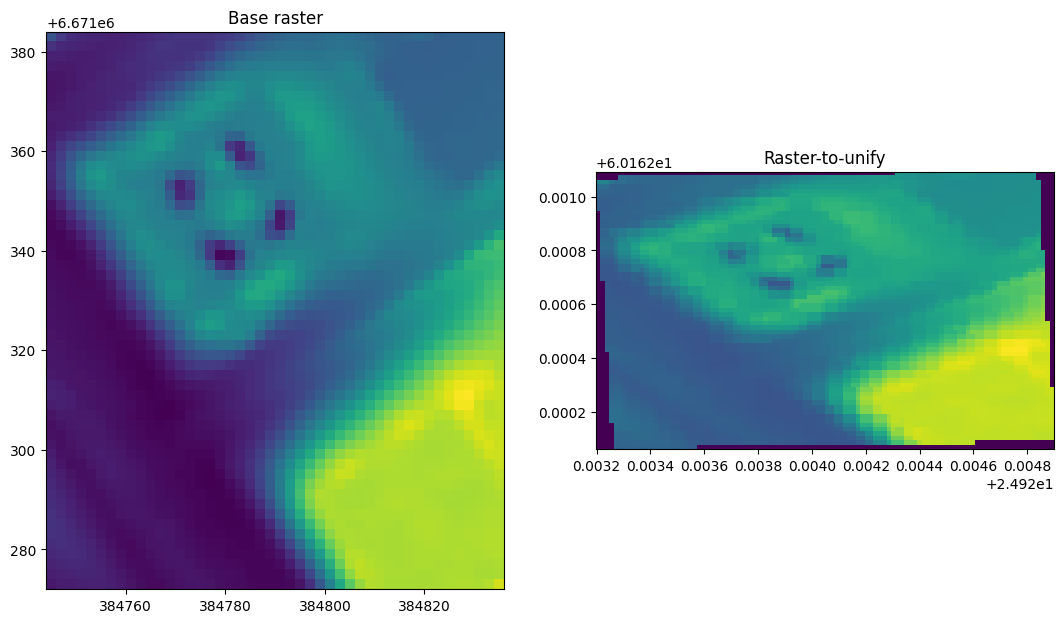

In [19]:
# See how the data looks like
figure, ax = plt.subplots(1, 2, figsize=(13,9))
show(base_raster, ax=ax[0])
ax[0].set_title("Base raster")
show(raster_to_unify, ax=ax[1])
ax[1].set_title("Raster-to-unify")

In [20]:
# Check that grid check returns False as it should
res = check_raster_grids([base_raster, raster_to_unify])
print(res)

False


In [21]:
print("Base raster data:")
print(f"CRS - {base_raster.crs}")
print(f"Pixel size - {base_raster.transform.a}, {abs(base_raster.transform.e)}")
print(f"Width, height - {base_raster.width}, {base_raster.width}")
print(f"Bounds - {base_raster.bounds}")

Base raster data:
CRS - EPSG:3067
Pixel size - 2.0, 2.0
Width, height - 46, 46
Bounds - BoundingBox(left=384744.0, bottom=6671272.0, right=384836.0, top=6671384.0)


In [22]:
print("Raster-to-unify data:")
print(f"CRS - {raster_to_unify.crs}")
print(f"Pixel size - {raster_to_unify.transform.a}, {abs(raster_to_unify.transform.e)}")
print(f"Width, height - {raster_to_unify.width}, {raster_to_unify.width}")
print(f"Bounds - {raster_to_unify.bounds}")

Raster-to-unify data:
CRS - EPSG:4326
Pixel size - 1.635769230768657e-05, 1.6357698412782105e-05
Width, height - 104, 104
Bounds - BoundingBox(left=24.923196547, bottom=60.162061552, right=24.924897747, top=60.163092087)


In [23]:
# Perform the unifying with NEAREST resampling
out_rasters = unify_raster_grids(base_raster, [raster_to_unify], resampling_method=Resampling.nearest)
out_image_nearest, out_meta_nearest = out_rasters[1]

In [24]:
# Perform the unifying with BILINEAR resampling
out_rasters = unify_raster_grids(base_raster, [raster_to_unify], resampling_method=Resampling.bilinear)
out_image_bilinear, out_meta_bilinear = out_rasters[1]

In [25]:
# Perform the unifying with CUBIC resampling
out_rasters = unify_raster_grids(base_raster, [raster_to_unify], resampling_method=Resampling.bilinear)
out_image_cubic, out_meta_cubic = out_rasters[1]

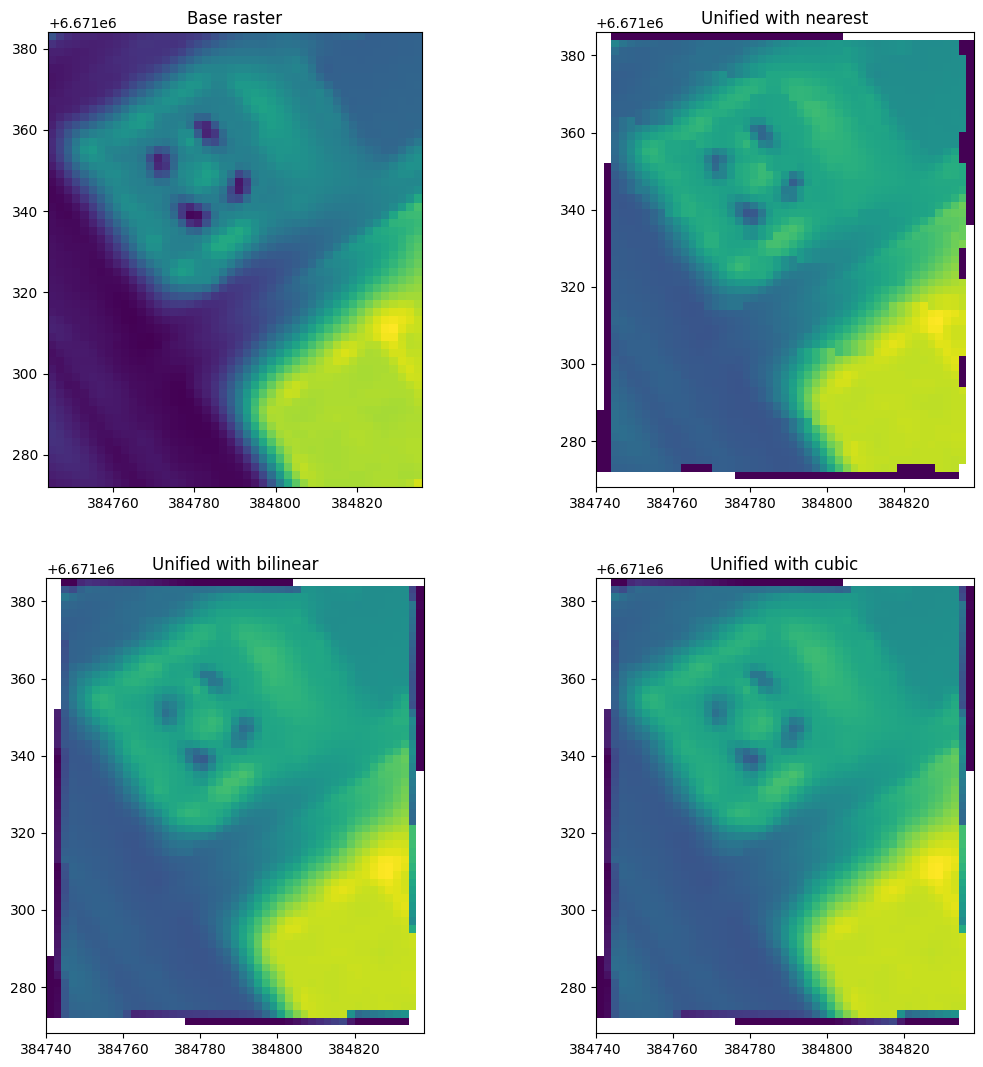

In [26]:
# Plot the results
figure, ax = plt.subplots(2, 2, figsize=(13,13))
show(base_raster, ax=ax[0, 0])
ax[0, 0].set_title("Base raster")

# Open and show first resampling result
with MemoryFile() as memfile:
	with memfile.open(**out_meta_nearest) as dataset:
		dataset.write(out_image_nearest)
	with memfile.open() as out_raster_1:
		show(out_raster_1, ax=ax[0, 1])
		ax[0, 1].set_title("Unified with nearest")

# Open and show second resampling result
with MemoryFile() as memfile:
	with memfile.open(**out_meta_bilinear) as dataset:
		dataset.write(out_image_bilinear)
	with memfile.open() as out_raster_2:
		show(out_raster_2, ax=ax[1, 0])
		ax[1, 0].set_title("Unified with bilinear")

# Open and show third resampling result
with MemoryFile() as memfile:
	with memfile.open(**out_meta_cubic) as dataset:
		dataset.write(out_image_cubic)
	with memfile.open() as out_raster_3:
		show(out_raster_3, ax=ax[1, 1])
		ax[1, 1].set_title("Unified with cubic")

In [27]:
# Check that result raster has now same metadata
print("Base raster data:")
print(f"CRS - {base_raster.crs}")
print(f"Pixel size - {base_raster.transform.a}, {abs(base_raster.transform.e)}")
print(f"Width, height - {base_raster.width}, {base_raster.width}")
print(f"Bounds - {base_raster.bounds}")

Base raster data:
CRS - EPSG:3067
Pixel size - 2.0, 2.0
Width, height - 46, 46
Bounds - BoundingBox(left=384744.0, bottom=6671272.0, right=384836.0, top=6671384.0)


In [28]:
print("Raster-to-unify data after unification:")
print(f"CRS - {out_raster_1.crs}")
print(f"Pixel size - {out_raster_1.transform.a}, {abs(out_raster_1.transform.e)}")
print(f"Width, height - {out_raster_1.width}, {out_raster_1.width}")
print(f"Bounds - {out_raster_1.bounds}")

Raster-to-unify data after unification:
CRS - EPSG:3067
Pixel size - 2.0, 2.0
Width, height - 49, 49
Bounds - BoundingBox(left=384740.0, bottom=6671268.0, right=384838.0, top=6671386.0)


In [29]:
# Check that grid check now returns true for all unified rasters
res = check_raster_grids([base_raster, out_raster_1, out_raster_2, out_raster_3])
print(res)

True


In [30]:
# Close the rasters
base_raster.close()
raster_to_unify.close()
out_raster_1.close()
out_raster_2.close()
out_raster_3.close()